In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
!pip3 install catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, accuracy_score, confusion_matrix, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **1-Load Data**

In [5]:
df = pd.read_csv('train.csv')
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [6]:
test = pd.read_csv('test.csv')
test.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
6,140706,Armaan,Male,47.0,Visakhapatnam,Working Professional,Teacher,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,MA,No,10.0,3.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
8,140708,Navya,Female,21.0,Surat,Student,NaN,1.0,NaN,7.39,3.0,NaN,Less than 5 hours,Healthy,BBA,No,8.0,1.0,Yes
9,140709,Harsha,Male,21.0,Jaipur,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,4.0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [9]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [10]:
missing_values_count = test.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,24632
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


# **2-Analisis de datos y valores faltantes**

## **2-1-Columna de profesion**

In [11]:
df.loc[df['Profession'].isnull()].head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
33,33,Tanmay,Male,29.0,Pune,Student,NaN,2.0,NaN,5.70,3.0,NaN,Less than 5 hours,Healthy,PhD,No,4.0,1.0,No,0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0


In [12]:
df.loc[df['Profession'].notnull()].head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
11,11,Aahana,Female,51.0,Patna,Working Professional,Teacher,NaN,1.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Arch,No,9.0,5.0,No,0


In [13]:
test[['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
0,Working Professional,Judge
1,Working Professional,Educational Consultant
2,Working Professional,Teacher
3,Student,NaN
4,Working Professional,Teacher
...,...,...
93795,Working Professional,Pilot
93796,Working Professional,Pilot
93797,Student,NaN
93798,Working Professional,Marketing Manager


In [14]:
df_1 = df[['Working Professional or Student', 'Profession']]
df_1.head()

,Working Professional or Student,Profession
0,Working Professional,Chef
1,Working Professional,Teacher
2,Student,NaN
3,Working Professional,Teacher
4,Working Professional,Business Analyst


In [15]:
print(len(df_1.loc[(df_1['Working Professional or Student']=='Student')&(df_1['Profession']=='Student')]))
print(df_1.loc[(df_1['Working Professional or Student']=='Student')&(df_1['Profession']=='Student')])

3
       Working Professional or Student Profession
20049                          Student    Student
20296                          Student    Student
126162                         Student    Student


In [16]:
ind = df.loc[(df['Working Professional or Student']=='Student') & (df['Profession'].isnull())].index
for i in ind:
    df.loc[i, 'Profession'] = 'Student'

In [17]:
ind = test.loc[(test['Working Professional or Student']=='Student') & (test['Profession'].isnull())].index
for i in ind:
    test.loc[i, 'Profession'] = 'Student'

In [18]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,8763
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [19]:
missing_values_count = test.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,5886
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


In [20]:
df.loc[df['Profession'].isnull()][['Working Professional or Student', 'Profession']]

,Working Professional or Student,Profession
29,Working Professional,NaN
36,Working Professional,NaN
43,Working Professional,NaN
48,Working Professional,NaN
50,Working Professional,NaN
...,...,...
140647,Working Professional,NaN
140655,Working Professional,NaN
140666,Working Professional,NaN
140667,Working Professional,NaN


In [21]:
df.loc[df['Profession'].isnull()][['Degree', 'Profession']]

,Degree,Profession
29,Class 12,NaN
36,Class 12,NaN
43,Class 12,NaN
48,Class 12,NaN
50,Class 12,NaN
...,...,...
140647,Class 12,NaN
140655,PhD,NaN
140666,Class 12,NaN
140667,MHM,NaN


In [22]:
df_2 = df.loc[df['Profession'].isnull()][['Degree', 'Profession']]
df_2.head()

,Degree,Profession
29,Class 12,NaN
36,Class 12,NaN
43,Class 12,NaN
48,Class 12,NaN
50,Class 12,NaN


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Class 12'),
  Text(1, 0, 'MA'),
  Text(2, 0, 'MSc'),
  Text(3, 0, 'MBA'),
  Text(4, 0, 'B.Arch'),
  Text(5, 0, 'MCA'),
  Text(6, 0, 'B.Com'),
  Text(7, 0, 'BSc'),
  Text(8, 0, 'M.Pharm'),
  Text(9, 0, 'MD'),
  Text(10, 0, 'B.Ed'),
  Text(11, 0, 'Degree'),
  Text(12, 0, 'BE'),
  Text(13, 0, 'BCA'),
  Text(14, 0, 'BHM'),
  Text(15, 0, 'ME'),
  Text(16, 0, 'LLM'),
  Text(17, 0, 'LLB'),
  Text(18, 0, 'M.Com'),
  Text(19, 0, 'B.Tech'),
  Text(20, 0, 'MHM'),
  Text(21, 0, 'B.Pharm'),
  Text(22, 0, 'LLBA'),
  Text(23, 0, 'M.Tech'),
  Text(24, 0, 'BBA'),
  Text(25, 0, 'BA'),
  Text(26, 0, '5.56'),
  Text(27, 0, 'MBBS'),
  Text(28, 0, 'M.Ed'),
  Text(29, 0, '5.88'),
  Text(30, 0, 'Navya'),
  Text(31, 0, 'M'),
  Text(32, 0, 'PhD')])

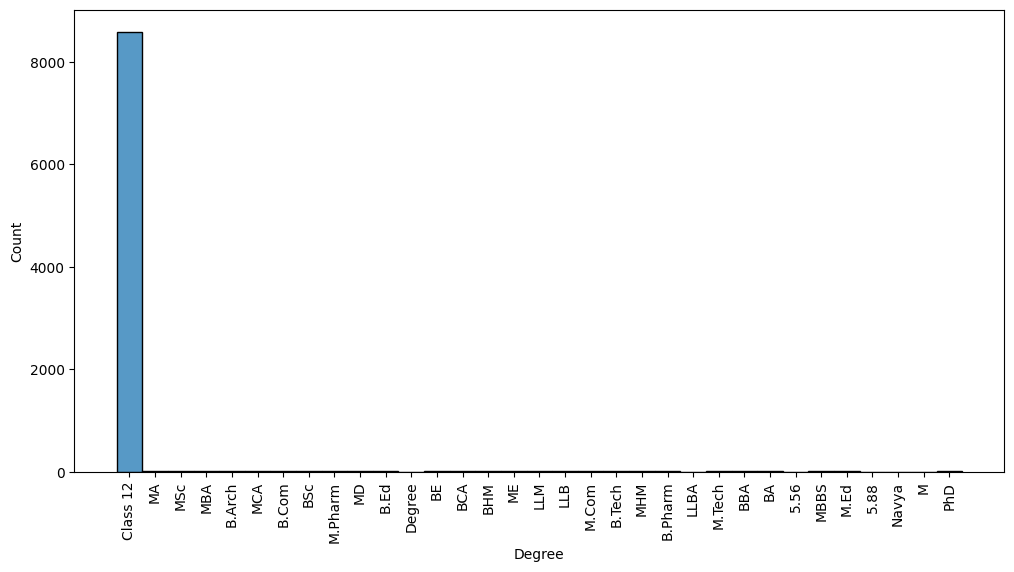

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(df_2['Degree'])
plt.xticks(rotation=90)

In [28]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [29]:
df.loc[(df['Profession']=='Class 12')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


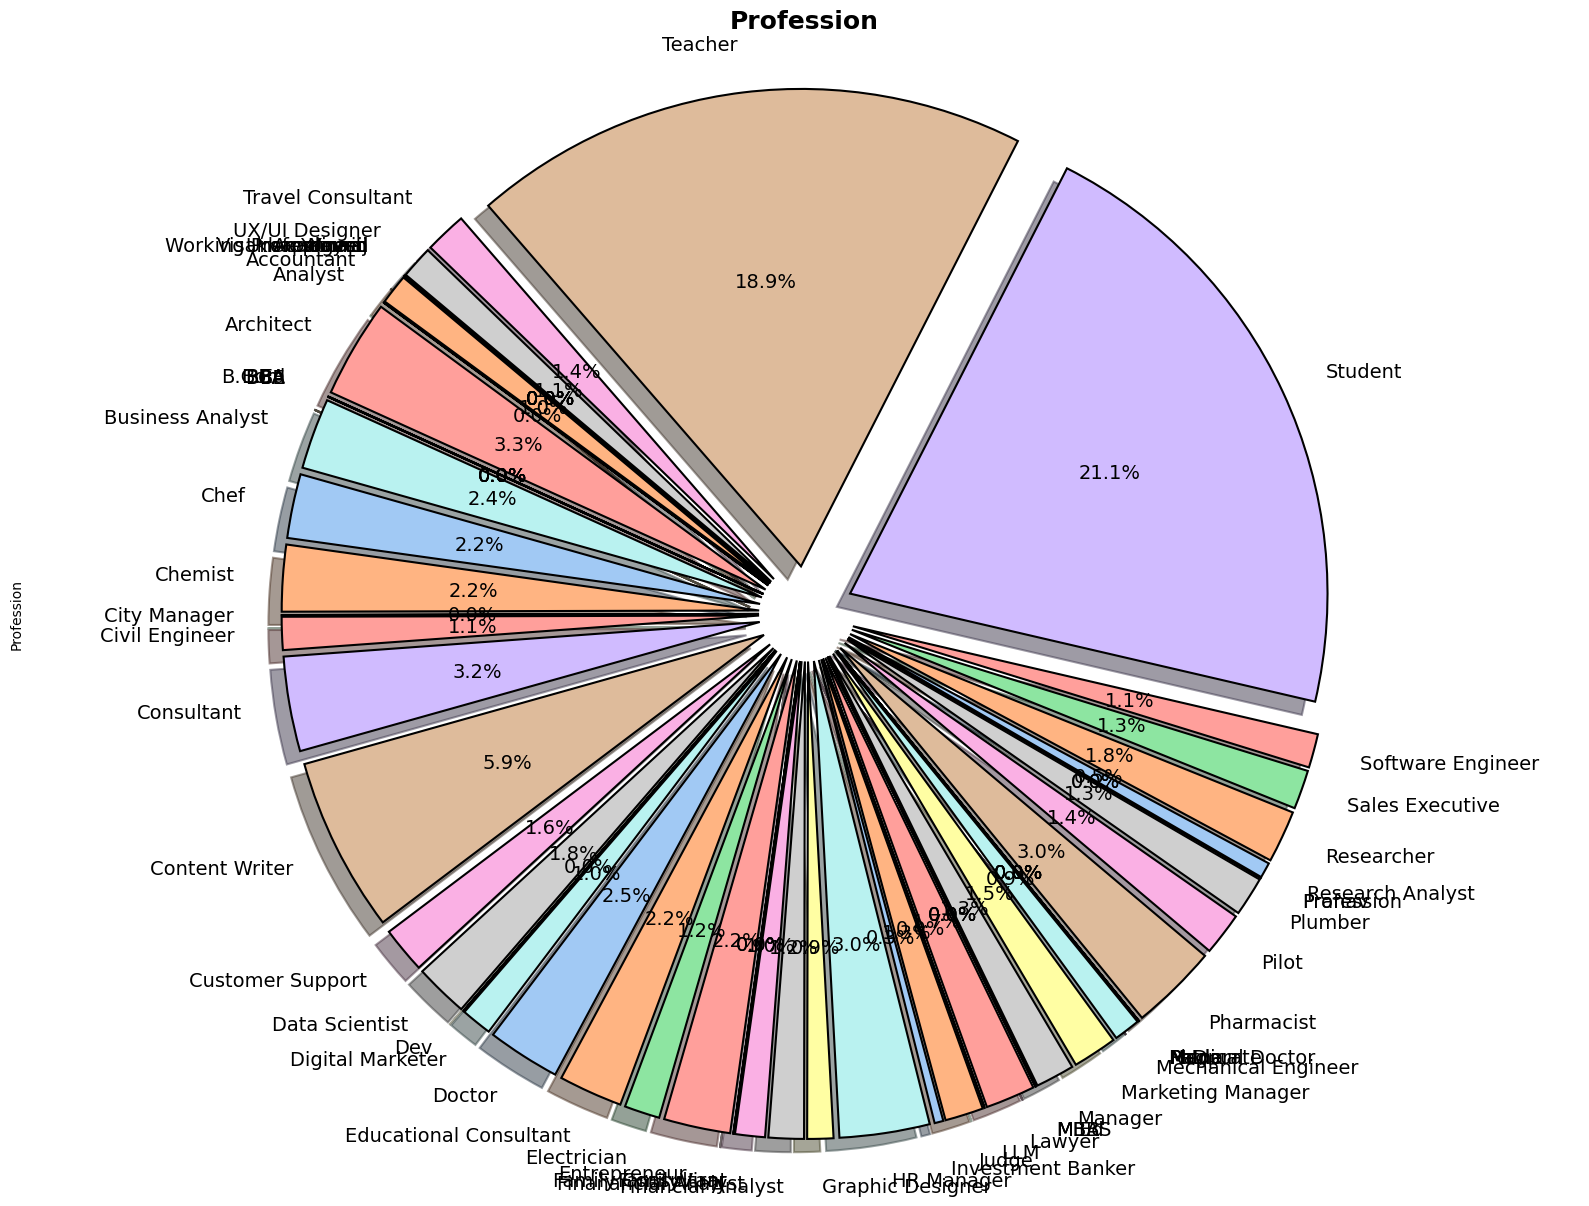

In [32]:

def plot_data(name, data):
    plt.figure(figsize=(20, 15))
    palette_color = sns.color_palette('pastel')
    explode = [0.1 for _ in range(data.nunique())]

    target_counts = df.groupby(name)[name].count()

    target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )

    plt.title(name, fontsize=18, weight='bold')
    plt.axis('equal')
    plt.show()

plot_data('Profession', df['Profession'])

In [33]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', nan, 'Educational Consultant',
       'Civil Engineer', 'Manager', 'Pharmacist', 'Financial Analyst',
       'Architect', 'Mechanical Engineer', 'Customer Support',
       'Consultant', 'Judge', 'Researcher', 'Pilot', 'Graphic Designer',
       'Travel Consultant', 'Digital Marketer', 'Lawyer',
       'Research Analyst', 'Sales Executive', 'Doctor', 'Unemployed',
       'Investment Banker', 'Family Consultant', 'B.Com', 'BE', 'Yogesh',
       'Dev', 'MBA', 'LLM', 'BCA', 'Academic', 'Profession',
       'FamilyVirar', 'City Manager', 'BBA', 'Medical Doctor',
       'Working Professional', 'MBBS', 'Patna', 'Unveil', 'B.Ed',
       'Nagpur', 'Moderate', 'M.Ed', 'Analyst', 'Pranav', 'Visakhapatnam',
       'Ph

In [34]:
ind = df.loc[(df['Degree']=='Class 12') & (df['Profession'].isnull())].index
for i in ind:
    df.loc[i, 'Profession'] = 'Class 12'

In [35]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', nan, 'Chemist', 'Content Writer', 'Consultant',
       'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', 'B.Ed', 'Working Professional', '3M', 'ME', 'B.Pharm',
       '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD', 'M.Ed', 'MD',
       'Name', 'MCA', 'Simran', 'Analyst', 'Profession', 'Unemployed',
       'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=object)

In [36]:
ind = test.loc[(test['Degree']=='Class 12') & (test['Profession'].isnull())].index
for i in ind:
    test.loc[i, 'Profession'] = 'Class 12'

In [37]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,173
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [38]:
missing_values_count = test.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,145
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


In [39]:
df.loc[df['Profession'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
591,591,Anvi,Female,49.0,Nagpur,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,MA,Yes,11.0,3.0,Yes,1
1316,1316,Shlok,Male,38.0,Ludhiana,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,7-8 hours,Unhealthy,MSc,Yes,1.0,4.0,No,0
2216,2216,Rudra,Male,20.0,Patna,Working Professional,NaN,NaN,3.0,NaN,NaN,4.0,5-6 hours,Unhealthy,MBA,Yes,8.0,4.0,Yes,0
2424,2424,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Moderate,B.Arch,Yes,7.0,5.0,Yes,1
3443,3443,Charvi,Female,26.0,Vasai-Virar,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Unhealthy,MCA,No,10.0,3.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138770,138770,Lavanya,Female,54.0,Nagpur,Working Professional,NaN,NaN,3.0,NaN,NaN,2.0,5-6 hours,Moderate,MCA,Yes,7.0,5.0,Yes,0
139506,139506,Tejas,Male,20.0,Ahmedabad,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BHM,Yes,4.0,4.0,No,1
139674,139674,Armaan,Male,20.0,Varanasi,Working Professional,NaN,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,PhD,Yes,9.0,5.0,No,0
140655,140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0


In [40]:
df_2 = df.loc[df['Profession'].isnull()][['Age', 'Profession']]
df_2.head()

,Age,Profession
591,49.0,NaN
1316,38.0,NaN
2216,20.0,NaN
2424,18.0,NaN
3443,26.0,NaN


<Axes: xlabel='Age', ylabel='Density'>

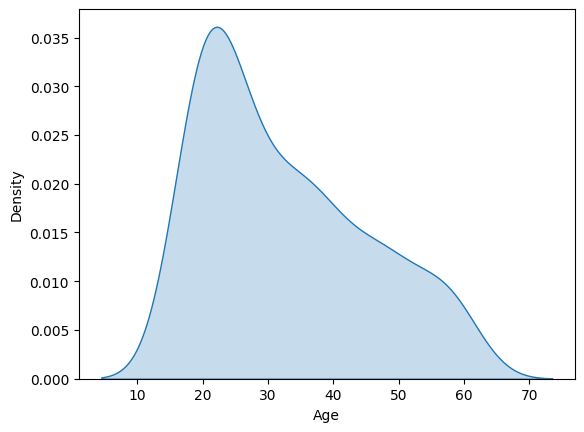

In [41]:
sns.kdeplot(data=df_2['Age'], shade=True)

In [42]:
df.dropna(subset='Profession',inplace=True)

In [43]:
#test.dropna(subset='Profession',inplace=True)

In [44]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,112631
Work Pressure,27913
CGPA,112631


## **2-2-Columna de presion academica**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Academic Pressure" with other columns
    </font>
</div>

In [45]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Yogesh', 'Dev', 'MBA', 'LLM',
       'BCA', 'Academic', 'Profession', 'FamilyVirar', 'City Manager',
       'BBA', 'Medical Doctor', 'Working Professional', 'MBBS', 'Patna',
       'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed', 'Analyst',
       'Pranav', 'Visakhapatna

In [46]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', nan, 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=object)

In [47]:
for i in Profession_name:
    x = df.loc[(df['Profession']==i) & (df['Academic Pressure'].notnull())]['Academic Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Profession']==i].index
        for j in ind:
            df.loc[j, 'Academic Pressure'] = x

In [48]:
for i in test_Profession_name:
    x = test.loc[(test['Profession']==i) & (test['Academic Pressure'].notnull())]['Academic Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Profession']==i].index
        for j in ind:
            test.loc[j, 'Academic Pressure'] = x

In [49]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,42900
Work Pressure,27913
CGPA,112631


In [50]:
missing_values_count = test.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,145
Academic Pressure,25414
Work Pressure,18778
CGPA,75034


In [51]:
df.loc[df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140688,140688,Rajat,Male,48.0,Hyderabad,Working Professional,Chemist,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Pharm,No,8.0,4.0,Yes,0
140692,140692,Raunak,Male,49.0,Bhopal,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,MBA,No,9.0,1.0,No,0
140693,140693,Shaurya,Male,55.0,Srinagar,Working Professional,Data Scientist,NaN,1.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,M.Tech,No,9.0,2.0,No,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [52]:
test.loc[test['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
5,140705,Kartik,Male,29.0,Mumbai,Working Professional,Customer Support,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,B.Com,No,3.0,2.0,Yes
7,140707,Ritika,Female,28.0,Mumbai,Working Professional,Customer Support,NaN,5.0,NaN,NaN,3.0,7-8 hours,Healthy,BA,Yes,0.0,2.0,No
12,140712,Advait,Male,48.0,Lucknow,Working Professional,Consultant,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Com,No,4.0,3.0,No
15,140715,Anvi,Female,29.0,Thane,Working Professional,Research Analyst,NaN,2.0,NaN,NaN,5.0,7-8 hours,Healthy,MBA,No,10.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93792,234492,Advait,Male,23.0,Delhi,Working Professional,Consultant,NaN,2.0,NaN,NaN,3.0,Less than 5 hours,Moderate,B.Com,Yes,12.0,4.0,No
93795,234495,Zoya,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes
93796,234496,Shlok,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes
93798,234498,Eshita,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes


In [53]:
df_2 = df.loc[df['Academic Pressure'].isnull()][['Profession']]
df_2.head()

,Profession
4,Business Analyst
5,Finanancial Analyst
6,Chemist
9,Electrician
10,Software Engineer


In [54]:
df_3 = test.loc[test['Academic Pressure'].isnull()][['Profession']]
df_3.head()

,Profession
1,Educational Consultant
5,Customer Support
7,Customer Support
12,Consultant
15,Research Analyst


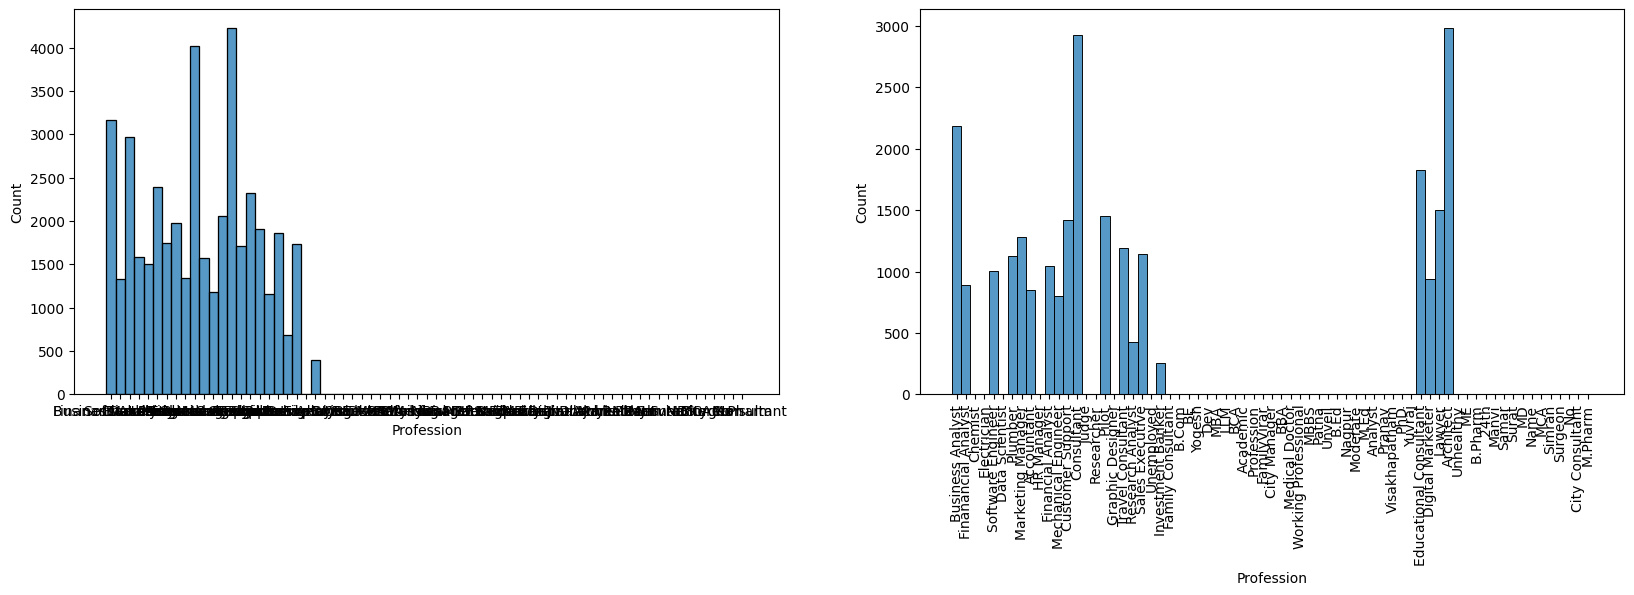

In [62]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

sns.histplot(df_2['Profession'], ax=axes[0]);
plt.xticks(rotation=90)
sns.histplot(df_3['Profession'], ax=axes[1]);
plt.xticks(rotation=90);

In [63]:
print('Profession Train Len: ',len(Profession_name))
print('Profession Test Len: ',len(test_Profession_name))

Profession Train Len:  65
Profession Test Len:  66


In [64]:
Profession_test = df_2['Profession'].unique()
test_Profession_test = df_3['Profession'].unique()

print('Profession Train Len: ',len(Profession_test))
print('Profession Test Len: ',len(test_Profession_test))

Profession Train Len:  50
Profession Test Len:  46


In [65]:
array_Profession_train = []
for i in Profession_test:
    x = df_2.loc[df_2['Profession']==i]
    if len(x)>=1:
        array_Profession_train.append(i)

In [66]:
array_Profession_test = []
for i in test_Profession_test:
    x = df_3.loc[df_3['Profession']==i]
    if len(x)>=1:
        array_Profession_test.append(i)

In [67]:
for i in array_Profession_test:
    x = df.loc[df['Profession']==i][['Academic Pressure']].mode()
    if len(x)!=0:
        print(i, x)

Educational Consultant    Academic Pressure
0                3.0
Digital Marketer    Academic Pressure
0                5.0
Lawyer    Academic Pressure
0                4.0
Architect    Academic Pressure
0                3.0


In [68]:
test_Profession = {
    'Educational Consultant' : 3,
    'Digital Marketer': 5,
    'Lawyer': 4,
    'Architect' : 3,

}

for name, value in test_Profession.items():
    ind = test.loc[test['Profession']==name].index
    for i in ind:
        test.loc[i, 'Academic Pressure'] = value

In [69]:
missing_values_count = test.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,145
Academic Pressure,18166
Work Pressure,18778
CGPA,75034


In [70]:
for i in array_Profession_train:
    x = test.loc[test['Profession']==i][['Academic Pressure']].mode()
    if len(x)!=0:
        print(i, x)

Chemist    Academic Pressure
0                3.0
Electrician    Academic Pressure
0                1.0
Data Scientist    Academic Pressure
0                4.0
HR Manager    Academic Pressure
0                5.0
Judge    Academic Pressure
0                4.0
Researcher    Academic Pressure
0                3.0
Graphic Designer    Academic Pressure
0                4.0


In [71]:
train_Profession = {
    'Chemist' : 3,
    'Electrician': 1,
    'Data Scientist': 4,
    'HR Manager' : 5,
    'Judge' : 4,
    'Researcher': 3,
    'Graphic Designer': 4,

}

for name, value in train_Profession.items():
    ind = df.loc[df['Profession']==name].index
    for i in ind:
        df.loc[i, 'Academic Pressure'] = value

In [72]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,26736
Work Pressure,27913
CGPA,112631


In [73]:
df_2 = df.loc[df['Academic Pressure'].isnull()][['Profession']]
df_2.head()

,Profession
4,Business Analyst
5,Finanancial Analyst
10,Software Engineer
14,Plumber
15,Marketing Manager


In [74]:
df_3 = test.loc[test['Academic Pressure'].isnull()][['Profession']]
df_3.head()

,Profession
5,Customer Support
7,Customer Support
12,Consultant
15,Research Analyst
28,Marketing Manager


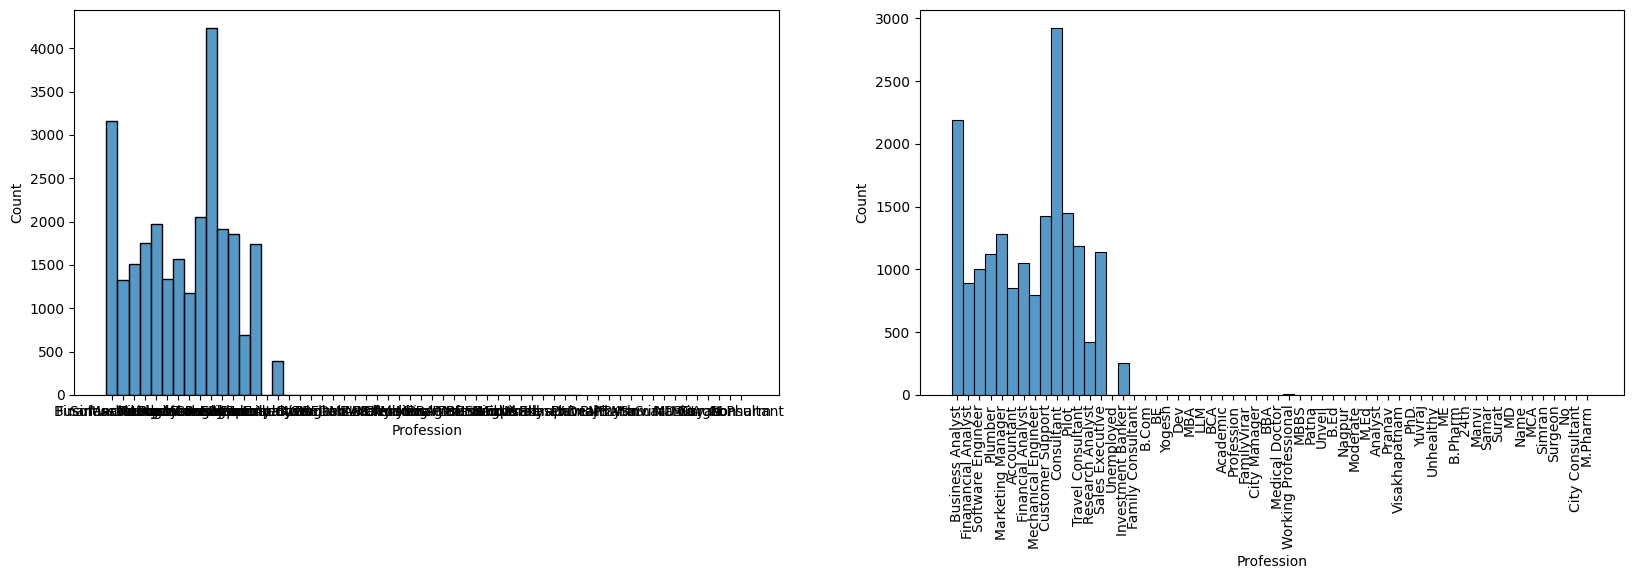

In [78]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

sns.histplot(df_2['Profession'], ax=axes[0]);
plt.xticks(rotation=90);
sns.histplot(df_3['Profession'], ax=axes[1]);
plt.xticks(rotation=90);

In [79]:
array_Profession_train = []
array_Profession_test = []

for i in Profession_test:
    x = df_2.loc[df_2['Profession']==i]
    if len(x)>=1:
        array_Profession_train.append(i)

for i in test_Profession_test:
    x = df_3.loc[df_3['Profession']==i]
    if len(x)>=1:
        array_Profession_test.append(i)

In [80]:
array_Profession_train = []
for i in Profession_test:
    x = df_2.loc[df_2['Profession']==i]
    if len(x)>=200:
        array_Profession_train.append(i)

In [81]:
array_Profession_test = []
for i in test_Profession_test:
    x = df_3.loc[df_3['Profession']==i]
    if len(x)>=200:
        array_Profession_test.append(i)

In [82]:
array_Profession_train

['Business Analyst',
 'Finanancial Analyst',
 'Software Engineer',
 'Plumber',
 'Marketing Manager',
 'Accountant',
 'Financial Analyst',
 'Mechanical Engineer',
 'Customer Support',
 'Consultant',
 'Pilot',
 'Travel Consultant',
 'Research Analyst',
 'Sales Executive',
 'Investment Banker']

In [83]:
array_Profession_test

['Customer Support',
 'Consultant',
 'Research Analyst',
 'Marketing Manager',
 'Plumber',
 'Pilot',
 'Mechanical Engineer',
 'Software Engineer',
 'Travel Consultant',
 'Finanancial Analyst',
 'Financial Analyst',
 'Business Analyst',
 'Sales Executive',
 'Accountant',
 'Investment Banker']

In [84]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Yogesh', 'Dev', 'MBA', 'LLM',
       'BCA', 'Academic', 'Profession', 'FamilyVirar', 'City Manager',
       'BBA', 'Medical Doctor', 'Working Professional', 'MBBS', 'Patna',
       'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed', 'Analyst',
       'Pranav', 'Visakhapatna

In [85]:
df.loc[df['Academic Pressure'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
10,10,Utkarsh,Male,55.0,Rajkot,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,BSc,No,6.0,4.0,Yes,0
14,14,Kiran,Male,50.0,Thane,Working Professional,Plumber,NaN,1.0,NaN,NaN,1.0,More than 8 hours,Moderate,BE,Yes,8.0,5.0,Yes,0
15,15,Aditi,Female,23.0,Patna,Working Professional,Marketing Manager,NaN,2.0,NaN,NaN,2.0,5-6 hours,Healthy,MA,Yes,6.0,4.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140678,140678,Rajveer,Male,53.0,Varanasi,Working Professional,Business Analyst,NaN,4.0,NaN,NaN,3.0,7-8 hours,Healthy,MCA,No,12.0,1.0,Yes,0
140682,140682,Raghavendra,Male,42.0,Delhi,Working Professional,Software Engineer,NaN,3.0,NaN,NaN,3.0,5-6 hours,Unhealthy,M.Tech,No,7.0,5.0,Yes,0
140692,140692,Raunak,Male,49.0,Bhopal,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,MBA,No,9.0,1.0,No,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0


In [86]:
df_4 = df.loc[df['Academic Pressure'].isnull()][['Degree']]
df_4.head()

,Degree
4,BBA
5,MCA
10,BSc
14,BE
15,MA


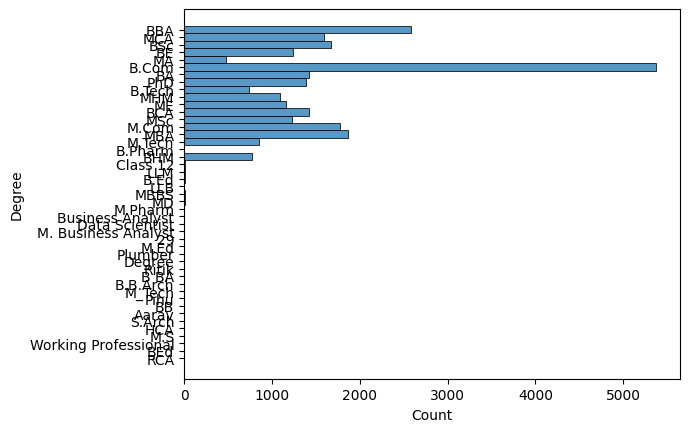

In [88]:
figsize=(30,20)
sns.histplot(data = df_4,y='Degree');

In [89]:
df.loc[(df['Degree']=='BHM') & (df['Working Professional or Student']=='Working Professional')& (df['Academic Pressure'].notnull())][['Academic Pressure']].mode()

,Academic Pressure
0,2.0


In [90]:
Academic_Pressure = {
    'BBA' : 3,
    'MCA': 3,
    'BSc': 3,
    'BE' : 3,
    'MA' : 5,
    'B.Com': 5,
    'BA': 5,
    'PhD': 3,
    'B.Tech': 4,
    'MHM': 2,
    'ME': 5,
    'BCA': 3,
    'MSc': 3,
    'M.Com': 3,
    'MBA': 3,
    'M.Tech': 3,
    'BHM': 2,
}

for name, value in Academic_Pressure.items():
    ind = df.loc[(df['Degree']==name) & (df['Working Professional or Student']=='Working Professional')& (df['Academic Pressure'].isnull())].index
    for i in ind:
        df.loc[i, 'Academic Pressure'] = value

for name, value in Academic_Pressure.items():
    ind = test.loc[(test['Degree']==name) & (test['Working Professional or Student']=='Working Professional')& (test['Academic Pressure'].isnull())].index
    for i in ind:
        test.loc[i, 'Academic Pressure'] = value

In [91]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,69
Work Pressure,27913
CGPA,112631


In [92]:
missing_values_count = test.isnull().sum()
missing_values_count

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,145
Academic Pressure,111
Work Pressure,18778
CGPA,75034


In [93]:
df.dropna(subset='Academic Pressure',inplace=True)
#test.dropna(subset='Academic Pressure',inplace=True)

## **2-3-Columna de satisfacción con el estudio**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Study Satisfaction" with other columns
    </font>
</div>

In [ ]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [ ]:
df.groupby('Study Satisfaction').groups

{1.0: [59, 94, 239, 285, 301, 316, 328, 336, 340, 343, 347, 348, 441, 447, 457, 475, 491, 510, 523, 534, 535, 539, 543, 592, 609, 611, 620, 623, 660, 673, 676, 710, 750, 779, 781, 821, 847, 863, 912, 941, 953, 991, 995, 997, 1006, 1015, 1032, 1047, 1093, 1134, 1148, 1152, 1187, 1222, 1240, 1275, 1301, 1319, 1328, 1391, 1393, 1457, 1472, 1593, 1605, 1618, 1643, 1655, 1657, 1701, 1762, 1850, 1969, 2006, 2060, 2068, 2097, 2108, 2127, 2147, 2183, 2203, 2226, 2294, 2295, 2343, 2385, 2399, 2406, 2423, 2431, 2460, 2471, 2482, 2592, 2633, 2674, 2685, 2687, 2695, ...], 2.0: [2, 30, 120, 139, 208, 255, 270, 274, 303, 337, 454, 455, 467, 509, 530, 538, 589, 617, 658, 683, 707, 708, 733, 735, 737, 746, 758, 759, 763, 813, 839, 843, 852, 861, 949, 955, 956, 1003, 1012, 1029, 1049, 1087, 1105, 1186, 1201, 1213, 1225, 1232, 1254, 1307, 1360, 1379, 1384, 1453, 1467, 1493, 1498, 1501, 1515, 1580, 1609, 1623, 1629, 1659, 1709, 1769, 1770, 1864, 1876, 1908, 1922, 1925, 1928, 1932, 1952, 1970, 1985, 2051,

In [ ]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Yogesh', 'Dev', 'MBA', 'BCA',
       'Academic', 'Profession', 'FamilyVirar', 'City Manager', 'BBA',
       'Patna', 'Unemployed', 'Nagpur', 'Moderate', 'Analyst',
       'Visakhapatnam', 'PhD', 'Yuvraj'], dtype=object)

In [ ]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', nan, 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=object)

In [ ]:
for i in test_Profession_name:
    x = test.loc[(test['Profession']==i) & (test['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Profession']==i].index
        for j in ind:
            test.loc[j, 'Study Satisfaction'] = x

In [ ]:
for i in Profession_name:
    x = df.loc[(df['Profession']==i) & (df['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Profession']==i].index
        for j in ind:
            df.loc[j, 'Study Satisfaction'] = x

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       25413
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,NaN,8.97,4.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,1.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['Study Satisfaction']]))
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Working Professional or Student']=='Student')][['Study Satisfaction']]))

42831
0


In [ ]:
print(len(df.loc[(df['Study Satisfaction'].notnull()) & (df['Profession']=='Teacher')][['Study Satisfaction']]))
print(len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Profession']=='Teacher')][['Study Satisfaction']]))

24906
0


In [ ]:
Degree_name = df['Degree'].unique()
Degree_name

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', '20', 'Class 11', 'H_Pharm',
       'M', 'P.Com', 'BPharm', 'M.Arch', 'LL.Com', 'MPharm', 'L.Ed',
       'P.Pharm', 'Kalyan', 'Unite', 'BArch', 'HR Manager', 'Badhya',
       'S.Pharm', 'Vrinda', 'Bhavesh', '0', 'LLCom', 'MTech', 'Vivaan',
       'BPA', '5.61', 'Brit', 'B.03', 'MEd', 'B', '7.06', 'ACA',
       'Brithika', 'CGPA', '24', 'Jhanvi', 'LLTech', 'LLBA',
       'Entrepreneur', '8.56', 'LHM', 'Lata', 'Marsh', 'B.Student',
       'LL B.Ed', 'Mahika', 'K.Ed', 'B.3.79', 'Mthanya', 'Esha', 'LLS',
       'LLEd', 'E.Tech', 'Doctor', 'N.Pharm', 'LCA', 'B B.Com', 'Mihir',
       'Advait'], dtype=object)

In [ ]:
for i in Degree_name:
    x = len(df.loc[(df['Study Satisfaction'].notnull()) & (df['Degree']==i)][['Study Satisfaction']])
    y = len(df.loc[(df['Study Satisfaction'].isnull()) & (df['Degree']==i)][['Study Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

BHM notnull:  3521 isnull:  774
LLB notnull:  3414 isnull:  922
B.Pharm notnull:  4863 isnull:  985
BBA notnull:  1677 isnull:  3350
MCA notnull:  2721 isnull:  2505
MD notnull:  2730 isnull:  635
BSc notnull:  2386 isnull:  2634
ME notnull:  1400 isnull:  2228
B.Arch notnull:  8727 isnull:  2
BCA notnull:  2926 isnull:  2803
BE notnull:  1346 isnull:  1750
MA notnull:  1745 isnull:  1135
B.Ed notnull:  11671 isnull:  3
B.Com notnull:  2727 isnull:  5380
MBA notnull:  1568 isnull:  2242
M.Com notnull:  1313 isnull:  1773
MHM notnull:  2194 isnull:  1090
BA notnull:  2077 isnull:  1671
Class 12 notnull:  14707 isnull:  10
M.Tech notnull:  2341 isnull:  2130
PhD notnull:  1126 isnull:  1974
M.Ed notnull:  5661 isnull:  0
MSc notnull:  2432 isnull:  2442
B.Tech notnull:  2156 isnull:  2264
LLM notnull:  3858 isnull:  780
MBBS notnull:  2865 isnull:  205
M.Pharm notnull:  3402 isnull:  1128
UX/UI Designer notnull:  2 isnull:  2
MPA notnull:  1 isnull:  0
BH notnull:  1 isnull:  0
Nalini no

In [ ]:
for i in Degree_name:
    x = df.loc[(df['Degree']==i) & (df['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Degree']==i].index
        for j in ind:
            df.loc[j, 'Study Satisfaction'] = x

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                             27913
CGPA                                     112562
Study Satisfaction                            9
Job Satisfaction                          27905
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
test_Degree_name = test['Degree'].unique()
test_Degree_name

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'BTech', 'MSc', 'BArch', 'B. Gender', 'B.Study_Hours',
       'Advait', 'M.Arch', 'A.Ed', 'Mechanical Engineer', 'B.H', 'B.Sc',
       'B', 'M.UI', 'Vibha', 'B BCA', 'B.Press', 'BPharm', 'Gagan',
       'MPharm', 'Travel Consultant', '5.65', 'Business Analyst',
       'Eshita', 'B_Com', 'Navya', 'B._Pharm', 'Pune', 'Bian', 'B.M.Com',
       'Kavya', 'M.M.Ed', 'S.Pharm', 'Vrinda', 'M', 'E.Ed', '3.0',
       'Moham', 'B.BA', nan, 'I.Ed', 'Degree', 'Magan', 'B B.Tech',
       'M.B.Ed', 'Bhopal', 'B Financial Analyst', 'GCA', 'G.Ed', 'Rupak',
       'RCA', 'B.CA', 'PCA', 'J.Ed', 'BH', 'BEd', '8.95', 'Aadhya', '20',
       'Banchal', 'M.', 'K.Ed', 'BHCA'], dtype=object)

In [ ]:
for i in test_Degree_name:
    x = len(test.loc[(test['Study Satisfaction'].notnull()) & (test['Degree']==i)][['Study Satisfaction']])
    y = len(test.loc[(test['Study Satisfaction'].isnull()) & (test['Degree']==i)][['Study Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

LLB notnull:  2333 isnull:  605
B.Ed notnull:  6568 isnull:  1194
B.Arch notnull:  4190 isnull:  1847
BSc notnull:  1951 isnull:  1363
BCA notnull:  2655 isnull:  1214
B.Com notnull:  1401 isnull:  4038
MA notnull:  1535 isnull:  398
BA notnull:  1267 isnull:  1223
BBA notnull:  1656 isnull:  1731
Class 12 notnull:  9803 isnull:  9
MD notnull:  2275 isnull:  14
MBA notnull:  1241 isnull:  1229
M.Ed notnull:  3070 isnull:  637
M.Pharm notnull:  2982 isnull:  13
BHM notnull:  2282 isnull:  494
LLM notnull:  2230 isnull:  903
PhD notnull:  1075 isnull:  998
M.Com notnull:  764 isnull:  1364
BE notnull:  1187 isnull:  979
MBBS notnull:  2024 isnull:  9
B.Tech notnull:  2299 isnull:  586
ME notnull:  1489 isnull:  902
MCA notnull:  2093 isnull:  1345
B.Pharm notnull:  3977 isnull:  10
MHM notnull:  1455 isnull:  694
M.Tech notnull:  2356 isnull:  661
BTech notnull:  0 isnull:  4
MSc notnull:  2173 isnull:  923
BArch notnull:  0 isnull:  1
B. Gender notnull:  1 isnull:  0
B.Study_Hours notnu

In [ ]:
for i in test_Degree_name:
    x = test.loc[(test['Degree']==i) & (test['Study Satisfaction'].notnull())]['Study Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Degree']==i].index
        for j in ind:
            test.loc[j, 'Study Satisfaction'] = x

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                          21
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
df.dropna(subset='Study Satisfaction',inplace=True)
#test.dropna(subset='Study Satisfaction',inplace=True)

## **2-4-Columna de presion laboral**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Work Pressure" with other columns
    </font>
</div>

In [ ]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,4.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,NaN,8.97,1.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,5.0,NaN,4.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,1.0,NaN,4.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,2.0,NaN,4.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,5.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,3.0,NaN,1.0,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,NaN,5.90,4.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,4.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [ ]:
Profession_name = df['Profession'].unique()
Profession_name

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Class 12',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Yogesh', 'Dev', 'MBA', 'BCA',
       'Academic', 'Profession', 'FamilyVirar', 'City Manager', 'BBA',
       'Patna', 'Unemployed', 'Nagpur', 'Moderate', 'Analyst',
       'Visakhapatnam', 'PhD', 'Yuvraj'], dtype=object)

In [ ]:
for i in Profession_name:
    x = len(df.loc[(df['Work Pressure'].notnull()) & (df['Profession']==i)][['Work Pressure']])
    y = len(df.loc[(df['Work Pressure'].isnull()) & (df['Profession']==i)][['Work Pressure']])
    print(i, 'notnull: ', x, 'isnull: ', y)

Chef notnull:  2860 isnull:  2
Teacher notnull:  24900 isnull:  6
Student notnull:  7 isnull:  27867
Business Analyst notnull:  3156 isnull:  0
Finanancial Analyst notnull:  1325 isnull:  0
Chemist notnull:  2963 isnull:  0
Electrician notnull:  1582 isnull:  0
Software Engineer notnull:  1509 isnull:  0
Data Scientist notnull:  2390 isnull:  0
Plumber notnull:  1740 isnull:  0
Marketing Manager notnull:  1975 isnull:  0
Accountant notnull:  1339 isnull:  0
Entrepreneur notnull:  2967 isnull:  1
HR Manager notnull:  4020 isnull:  0
UX/UI Designer notnull:  1451 isnull:  1
Content Writer notnull:  7811 isnull:  3
Class 12 notnull:  8577 isnull:  13
Educational Consultant notnull:  2851 isnull:  1
Civil Engineer notnull:  1469 isnull:  1
Manager notnull:  1736 isnull:  1
Pharmacist notnull:  3891 isnull:  2
Financial Analyst notnull:  1571 isnull:  0
Architect notnull:  4362 isnull:  8
Mechanical Engineer notnull:  1175 isnull:  1
Customer Support notnull:  2049 isnull:  0
Consultant not

In [ ]:
for i in Profession_name:
    x = df.loc[(df['Profession']==i) & (df['Work Pressure'].notnull())]['Work Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Profession']==i].index
        for j in ind:
            df.loc[j, 'Work Pressure'] = x

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112553
Study Satisfaction                            0
Job Satisfaction                          27905
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
test_Profession_name = test['Profession'].unique()
test_Profession_name

array(['Judge', 'Educational Consultant', 'Teacher', 'Student',
       'Customer Support', 'Class 12', 'Chemist', 'Content Writer',
       'Consultant', 'HR Manager', 'Research Analyst', 'Digital Marketer',
       'Electrician', 'Marketing Manager', 'Plumber', 'Pharmacist',
       'Lawyer', 'Pilot', 'Architect', 'Chef', 'Graphic Designer',
       'Entrepreneur', 'Manager', 'Mechanical Engineer',
       'Software Engineer', 'Travel Consultant', 'Finanancial Analyst',
       'Financial Analyst', 'Doctor', 'Business Analyst',
       'UX/UI Designer', 'Sales Executive', 'Data Scientist',
       'Accountant', 'Researcher', 'Civil Engineer', 'Investment Banker',
       'Unhealthy', nan, 'B.Ed', 'Working Professional', '3M', 'ME',
       'B.Pharm', '24th', 'Manvi', 'Yogesh', 'Samar', 'Surat', 'PhD',
       'M.Ed', 'MD', 'Name', 'MCA', 'Simran', 'Analyst', 'Profession',
       'Unemployed', 'BBA', 'M.Tech', 'LLM', 'Surgeon', 'No', 'Unveil',
       'City Consultant', 'M.Pharm'], dtype=object)

In [ ]:
for i in test_Profession_name:
    x = test.loc[(test['Profession']==i) & (test['Work Pressure'].notnull())]['Work Pressure'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Profession']==i].index
        for j in ind:
            test.loc[j, 'Work Pressure'] = x

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                                6
CGPA                                     75034
Study Satisfaction                          21
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
df.dropna(subset='Work Pressure',inplace=True)
#test.dropna(subset='Work Pressure',inplace=True)

## **2-5-Columna de satisfacción laboral**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "Job Satisfaction" with other columns
    </font>
</div>

In [ ]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [ ]:
print('Working Professional & Job Satisfaction = isnaull :',len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']]))
print('Working Professional & Job Satisfaction = notnaull :',len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']]))

print('Student & Job Satisfaction = isnaull :',len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Working Professional or Student']=='Student')][['Job Satisfaction']]))
print('Student & Job Satisfaction = notnaull :',len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Student')][['Job Satisfaction']]))

Working Professional & Job Satisfaction = isnaull : 12
Working Professional & Job Satisfaction = notnaull : 112536
Student & Job Satisfaction = isnaull : 27893
Student & Job Satisfaction = notnaull : 8


In [ ]:
for i in Degree_name:
    x = len(df.loc[(df['Job Satisfaction'].notnull()) & (df['Degree']==i) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']])
    y = len(df.loc[(df['Job Satisfaction'].isnull()) & (df['Degree']==i) & (df['Working Professional or Student']=='Working Professional')][['Job Satisfaction']])
    print(i, 'notnull: ', x, 'isnull: ', y)

BHM notnull:  3370 isnull:  0
LLB notnull:  3665 isnull:  0
B.Pharm notnull:  5038 isnull:  0
BBA notnull:  4331 isnull:  0
MCA notnull:  4182 isnull:  0
MD notnull:  2793 isnull:  0
BSc notnull:  4132 isnull:  0
ME notnull:  3443 isnull:  0
B.Arch notnull:  7251 isnull:  0
BCA notnull:  4296 isnull:  0
BE notnull:  2483 isnull:  0
MA notnull:  2336 isnull:  0
B.Ed notnull:  9806 isnull:  1
B.Com notnull:  6601 isnull:  0
MBA notnull:  3248 isnull:  0
M.Com notnull:  2352 isnull:  0
MHM notnull:  3093 isnull:  0
BA notnull:  3148 isnull:  0
Class 12 notnull:  8626 isnull:  11
M.Tech notnull:  3449 isnull:  0
PhD notnull:  2578 isnull:  0
M.Ed notnull:  4840 isnull:  0
MSc notnull:  3684 isnull:  0
B.Tech notnull:  3268 isnull:  0
LLM notnull:  4156 isnull:  0
MBBS notnull:  2374 isnull:  0
M.Pharm notnull:  3948 isnull:  0
UX/UI Designer notnull:  4 isnull:  0
MPA notnull:  0 isnull:  0
BH notnull:  0 isnull:  0
Nalini notnull:  2 isnull:  0
BEd notnull:  1 isnull:  0
B.Sc notnull:  2 

In [ ]:
for i in Degree_name:
    x = df.loc[(df['Degree']==i) & (df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Working Professional')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Degree']==i].index
        for j in ind:
            df.loc[j, 'Job Satisfaction'] = x

In [ ]:
for i in Degree_name:
    x = df.loc[(df['Degree']==i) & (df['Job Satisfaction'].notnull()) & (df['Working Professional or Student']=='Student')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = df.loc[df['Degree']==i].index
        for j in ind:
            df.loc[j, 'Job Satisfaction'] = x

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112553
Study Satisfaction                            0
Job Satisfaction                             26
Sleep Duration                                0
Dietary Habits                                4
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
test_Degree_name = test['Degree'].unique()
test_Degree_name

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'BTech', 'MSc', 'BArch', 'B. Gender', 'B.Study_Hours',
       'Advait', 'M.Arch', 'A.Ed', 'Mechanical Engineer', 'B.H', 'B.Sc',
       'B', 'M.UI', 'Vibha', 'B BCA', 'B.Press', 'BPharm', 'Gagan',
       'MPharm', 'Travel Consultant', '5.65', 'Business Analyst',
       'Eshita', 'B_Com', 'Navya', 'B._Pharm', 'Pune', 'Bian', 'B.M.Com',
       'Kavya', 'M.M.Ed', 'S.Pharm', 'Vrinda', 'M', 'E.Ed', '3.0',
       'Moham', 'B.BA', nan, 'I.Ed', 'Degree', 'Magan', 'B B.Tech',
       'M.B.Ed', 'Bhopal', 'B Financial Analyst', 'GCA', 'G.Ed', 'Rupak',
       'RCA', 'B.CA', 'PCA', 'J.Ed', 'BH', 'BEd', '8.95', 'Aadhya', '20',
       'Banchal', 'M.', 'K.Ed', 'BHCA'], dtype=object)

In [ ]:
for i in test_Degree_name:
    x = test.loc[(test['Degree']==i) & (test['Job Satisfaction'].notnull()) & (test['Working Professional or Student']=='Working Professional')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Degree']==i].index
        for j in ind:
            test.loc[j, 'Job Satisfaction'] = x

In [ ]:
for i in test_Degree_name:
    x = test.loc[(test['Degree']==i) & (test['Job Satisfaction'].notnull()) & (test['Working Professional or Student']=='Student')]['Job Satisfaction'].mode()
    if len(x)!=0:
        x = int(x[0])
        ind = test.loc[test['Degree']==i].index
        for j in ind:
            test.loc[j, 'Job Satisfaction'] = x

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                                6
CGPA                                     75034
Study Satisfaction                          21
Job Satisfaction                            15
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
df.dropna(subset='Job Satisfaction',inplace=True)
#test.dropna(subset='Job Satisfaction',inplace=True)

## **2-6-Columna de promedio de calificaciones**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I checked the relationship of column "CGPA" with other columns
    </font>
</div>

In [ ]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,5.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,2.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,2.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,2.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,2.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [ ]:
print('Working Professional & CGPA = isnaull :',len(df.loc[(df['CGPA'].isnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]))
print('Working Professional & CGPA = notnaull :',len(df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]))

print('Student & CGPA = isnaull :',len(df.loc[(df['CGPA'].isnull()) & (df['Working Professional or Student']=='Student')][['CGPA']]))
print('Student & CGPA = notnaull :',len(df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Student')][['CGPA']]))

Working Professional & CGPA = isnaull : 112544
Working Professional & CGPA = notnaull : 4
Student & CGPA = isnaull : 9
Student & CGPA = notnaull : 27866


In [ ]:
df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Working Professional')][['CGPA']]

,CGPA
18752,8.14
41915,8.04
55827,8.11
99062,5.42


In [ ]:
df.loc[(df['CGPA'].notnull()) & (df['Working Professional or Student']=='Student')][['CGPA']].head()

,CGPA
2,8.97
8,5.90
26,7.03
30,5.59
32,8.13


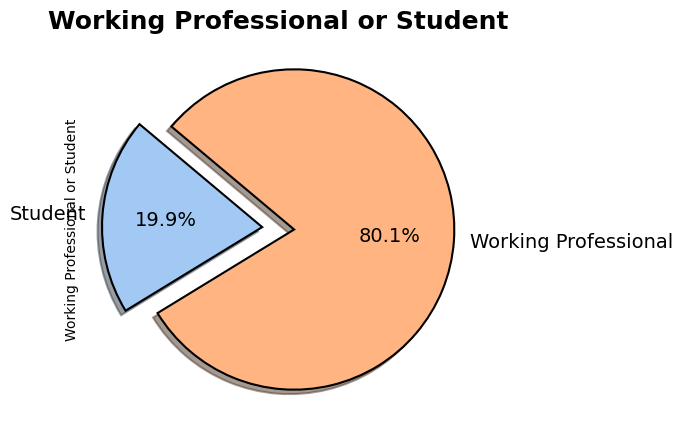

In [ ]:
plot_data('Working Professional or Student', df['Working Professional or Student'])

## **2-7-Duracion del sueño**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I normalized the "Sleep Duration" column values
    </font>
</div>

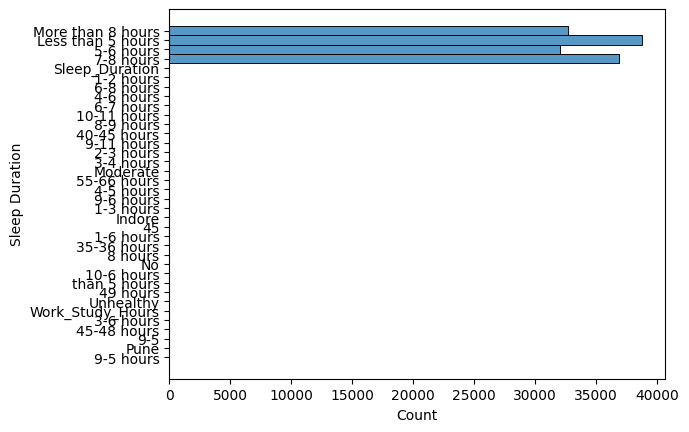

In [ ]:
figsize=(20,10)
sns.histplot(data = df ,y='Sleep Duration');

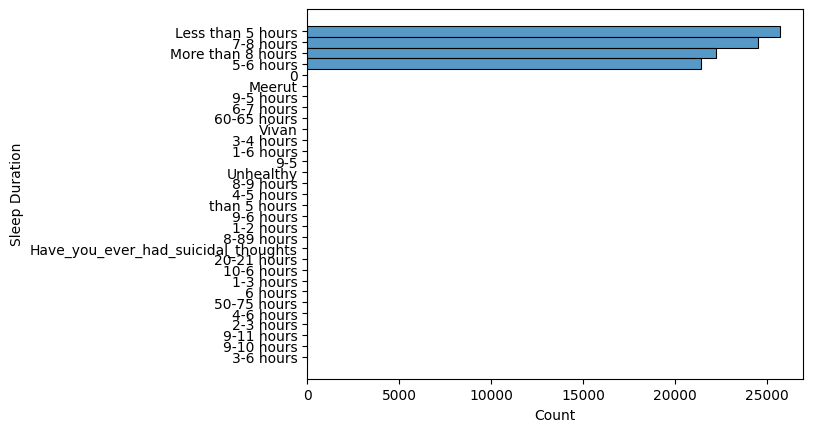

In [ ]:
figsize=(20,10)
sns.histplot(data = test ,y='Sleep Duration');

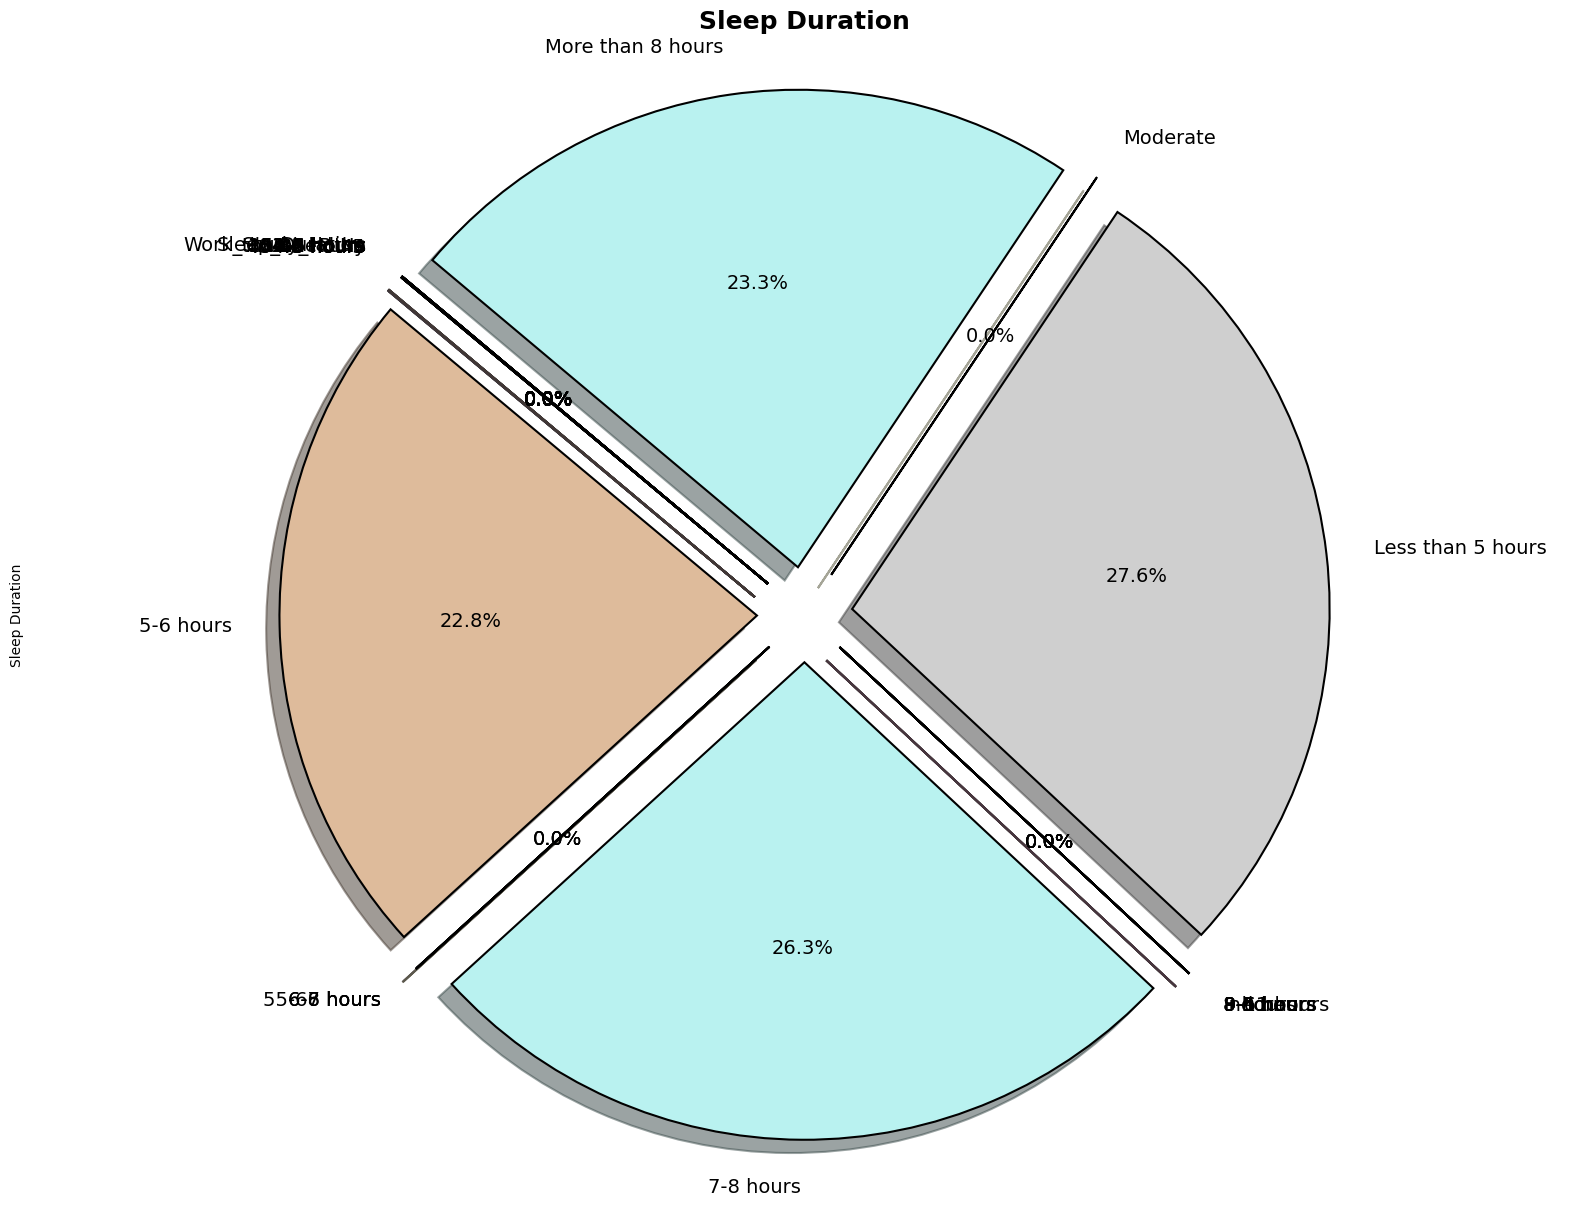

In [94]:
figsize=(20,10)
plot_data('Sleep Duration', df['Sleep Duration'])

In [ ]:
df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [ ]:
Sleep_Duration = {'More than 8 hours':0, 'Less than 5 hours':1, '5-6 hours':2, '7-8 hours':3}

df['Sleep Duration'] = df['Sleep Duration'].map(Sleep_Duration)
test['Sleep Duration'] = test['Sleep Duration'].map(Sleep_Duration)

## **Habitos de dieta**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
I normalized the "Dietary Habits" column values
    </font>
</div>

In [ ]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,5.0,0.0,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,1.0,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,2.0,2.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,2.0,1.0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,2.0,2.0,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,2.0,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,3.0,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,3.0,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,2.0,2.0,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,2.0,2.0,Healthy,ME,Yes,7.0,2.0,Yes,0


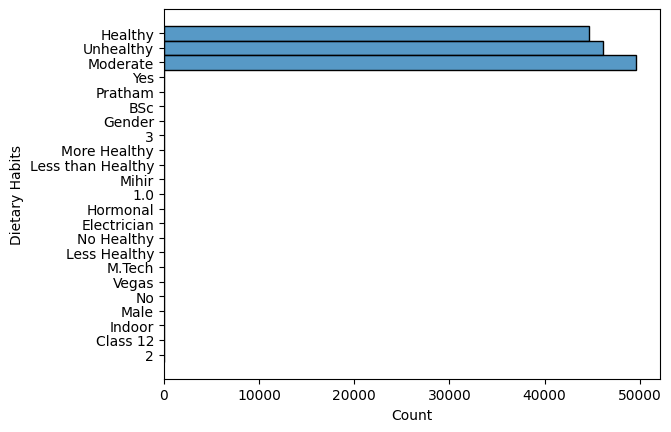

In [ ]:
figsize=(20,10)
sns.histplot(data = df ,y='Dietary Habits');

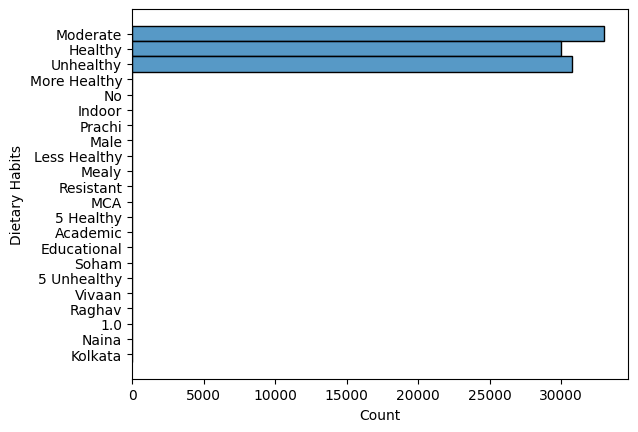

In [ ]:
figsize=(20,10)
sns.histplot(data = test ,y='Dietary Habits');

In [ ]:
df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [ ]:
Dietary_Habits = {'Unhealthy':0, 'Moderate':1, 'Healthy':2}

df['Dietary Habits'] = df['Dietary Habits'].map(Dietary_Habits)
test['Dietary Habits'] = test['Dietary Habits'].map(Dietary_Habits)

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                                6
CGPA                                     75034
Study Satisfaction                          21
Job Satisfaction                            15
Sleep Duration                              54
Dietary Habits                              30
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
test[['Dietary Habits']] = test[['Dietary Habits']].fillna(value=0)
test[['Sleep Duration']] = test[['Sleep Duration']].fillna(value=0)

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                                6
CGPA                                     75034
Study Satisfaction                          21
Job Satisfaction                            15
Sleep Duration                               0
Dietary Habits                               0
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
df.dropna(subset=['Sleep Duration', 'Dietary Habits', 'Financial Stress'],inplace=True)
#test.dropna(subset=['Sleep Duration', 'Dietary Habits', 'Financial Stress'],inplace=True)

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                             0
Work Pressure                                 0
CGPA                                     112476
Study Satisfaction                            0
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
missing_values_count = test.isnull().sum()
missing_values_count

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                                 145
Academic Pressure                          111
Work Pressure                                6
CGPA                                     75034
Study Satisfaction                          21
Job Satisfaction                            15
Sleep Duration                               0
Dietary Habits                               0
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [ ]:
#test.dropna(subset='Degree',inplace=True)

In [ ]:
df.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,2.0,5.0,NaN,3.0,5.0,0.0,2.0,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,1.0,0.0,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,3.0,3.0,8.97,1.0,2.0,2.0,2.0,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.0,2.0,NaN,4.0,2.0,1.0,1.0,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.0,2.0,NaN,4.0,2.0,2.0,0.0,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,3.0,5.0,NaN,4.0,5.0,2.0,2.0,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,3.0,2.0,NaN,1.0,2.0,3.0,1.0,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,2.0,NaN,1.0,2.0,3.0,0.0,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,3.0,3.0,5.90,4.0,2.0,2.0,1.0,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,1.0,3.0,NaN,4.0,2.0,2.0,2.0,ME,Yes,7.0,2.0,Yes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140313 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140313 non-null  int64  
 1   Name                                   140313 non-null  object 
 2   Gender                                 140313 non-null  object 
 3   Age                                    140313 non-null  float64
 4   City                                   140313 non-null  object 
 5   Working Professional or Student        140313 non-null  object 
 6   Profession                             140313 non-null  object 
 7   Academic Pressure                      140313 non-null  float64
 8   Work Pressure                          140313 non-null  float64
 9   CGPA                                   27837 non-null   float64
 10  Study Satisfaction                     140313 non-null  float

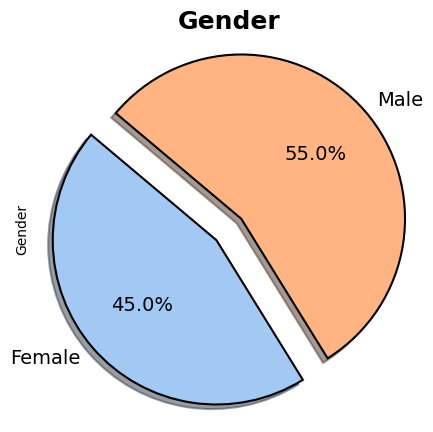

In [ ]:
plot_data('Gender', df['Gender'])